In [1]:
#Importing Libraries

In [13]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [3]:
#Extract Filenames from Folder

In [4]:
filenames = []
for file in os.listdir('C:\\Users\\code\\Desktop\\aurelapp\\backend\\fashion-dataset\\images'):
    filenames.append(os.path.join('C:\\Users\\code\\Desktop\\aurelapp\\backend\\fashion-dataset\\images',file))
    

In [5]:
len(filenames)

44441

In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalMaxPool2D, Input
from tensorflow.keras.models import Model

# Define the input shape
input_tensor = Input(shape=(224, 224, 3))

# Load the ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False)
base_model.trainable = False  # Freeze the base model

# Pass the input tensor through the base model
base_model_output = base_model(input_tensor)

# Add the pooling layer
pooling_layer = GlobalMaxPool2D()(base_model_output)

# Create the model
model = Model(inputs=input_tensor, outputs=pooling_layer)

# Print the summary of the model
model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [7]:
#Extracting Fetaures from Image

In [8]:
img = image.load_img('C:\\Users\\code\\Desktop\\aurelapp\\backend\\fashion-dataset\\images\\59635.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([0.00835589, 0.01895686, 0.00361406, ..., 0.        , 0.03085558,
       0.        ], dtype=float32)

In [9]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [10]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([0.01886862, 0.01673292, 0.00399705, ..., 0.00810947, 0.01061417,
       0.05708195], dtype=float32)

In [11]:
image_features = []
for file in filenames[0:44000]:
    image_features.append(extract_features_from_images(file, model))
    print("No :" ,file)
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
No : C:\Users\code\Desktop\aurelapp\backend\fashion-dataset\images\10000.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
No : C:\Users\code\Desktop\aurelapp\backend\fashion-dataset\images\10001.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
No : C:\Users\code\Desktop\aurelapp\backend\fashion-dataset\images\10002.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
No : C:\Users\code\Desktop\aurelapp\backend\fashion-dataset\images\10003.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
No : C:\Users\code\Desktop\aurelapp\backend\fashion-dataset\images\10004.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
No : C:\Users\code\Desktop\aurelapp\backend\fashion-dataset\images\10005.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
No : C:\Users\code\Desktop\aurelapp\backend\fashion-dataset\images\10006.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
No : C:\Users\code\Desktop\aurelapp\backend\fashion-dataset\images\10007.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
No : C:\Users\code\Desktop\aurelapp\

KeyboardInterrupt: 

In [15]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [16]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [17]:
#Loading Pickle Files

In [18]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [19]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [20]:
np.array(Image_features).shape

(21133, 2048)

In [21]:
#Finidng Simialar Images

In [22]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')

In [23]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [24]:
input_image = extract_features_from_images('C:\\Users\\code\\Desktop\\aurelapp\\backend\\fashion-dataset\\images\\59632.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [25]:
distance,indices = neighbors.kneighbors([input_image])

In [26]:
indices[0]

array([21061, 21056, 21084, 21054, 21083], dtype=int64)

In [27]:
from IPython.display import Image

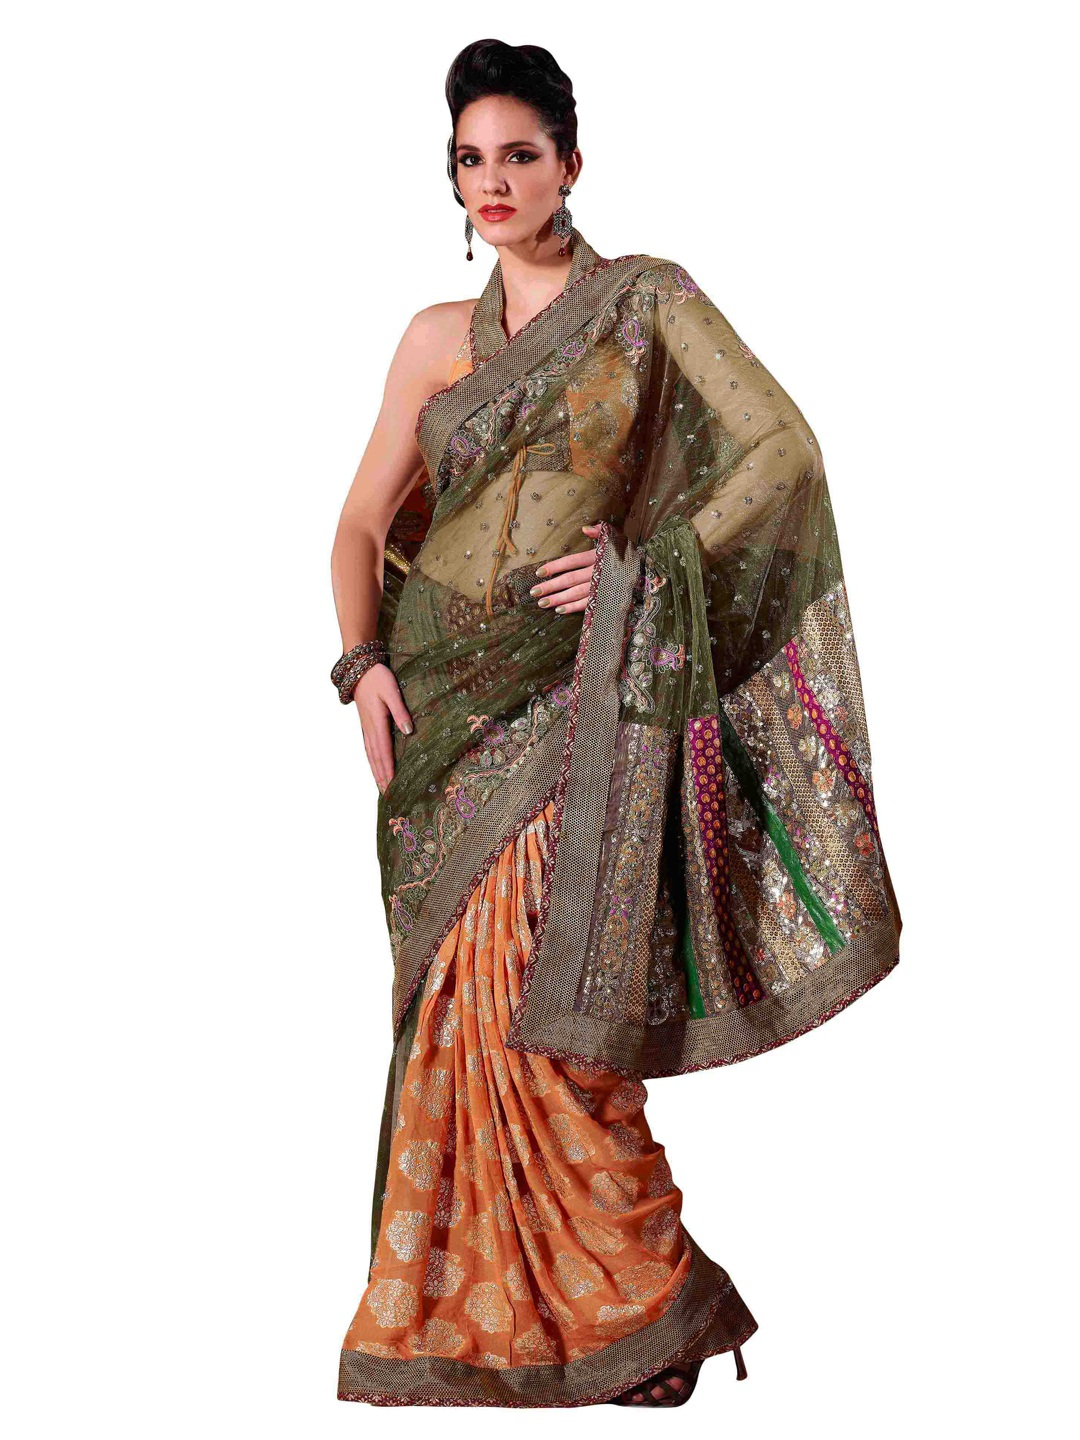

In [28]:
Image('C:\\Users\\code\\Desktop\\aurelapp\\backend\\fashion-dataset\\images\\59632.jpg')

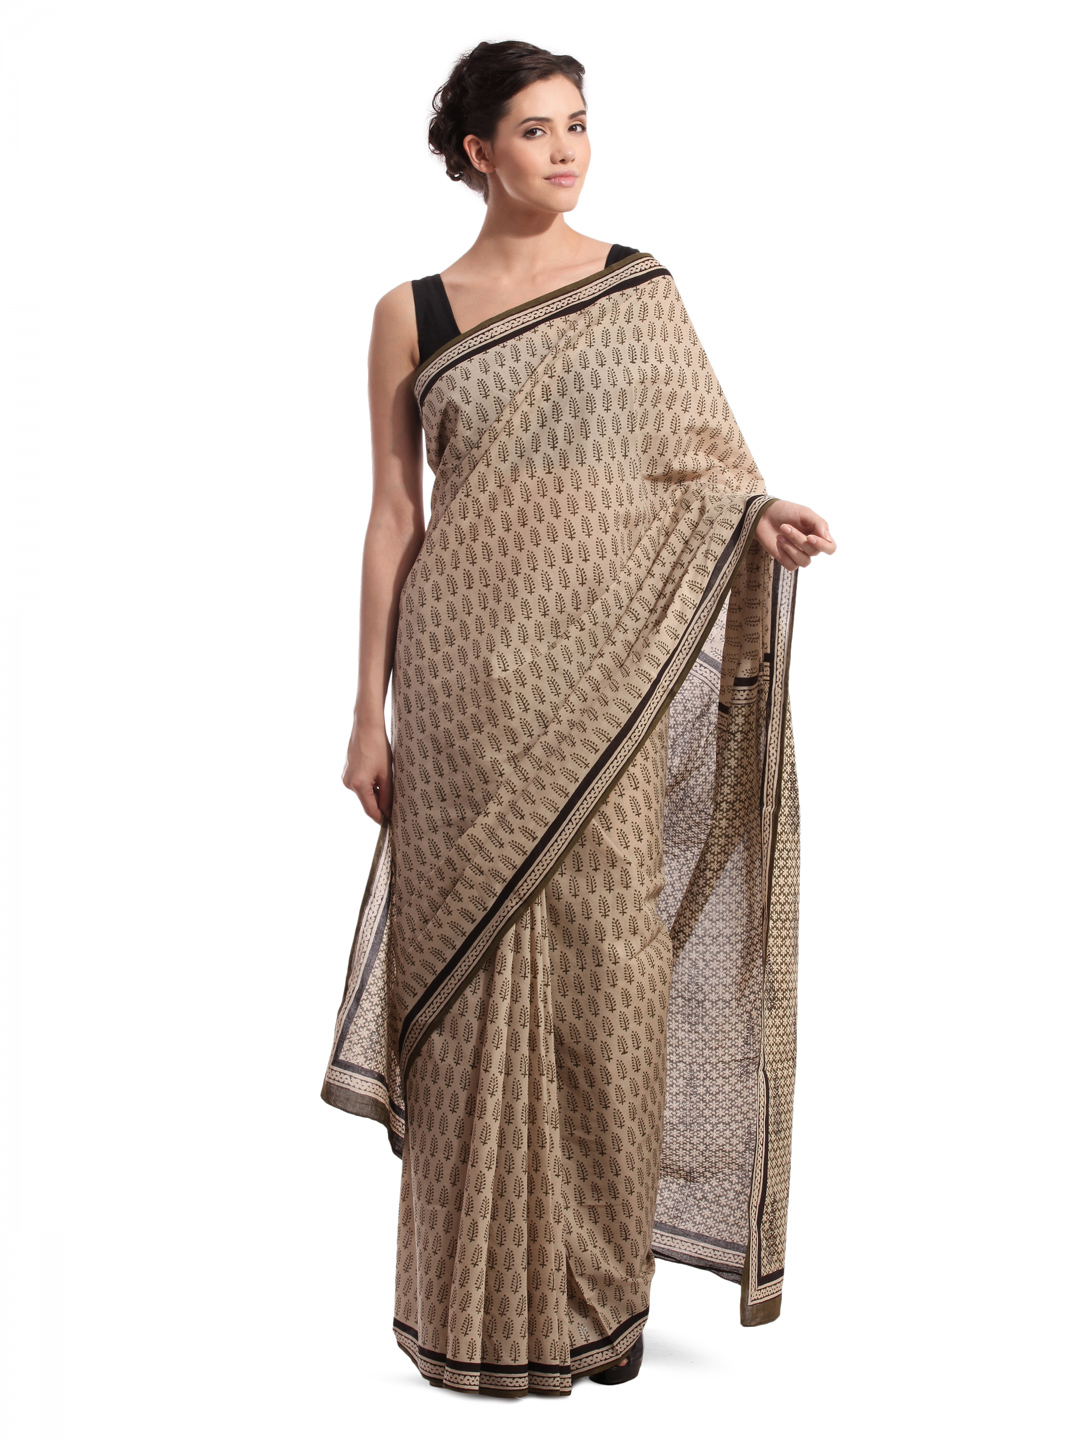

In [29]:
Image(filenames[indices[0][1]])

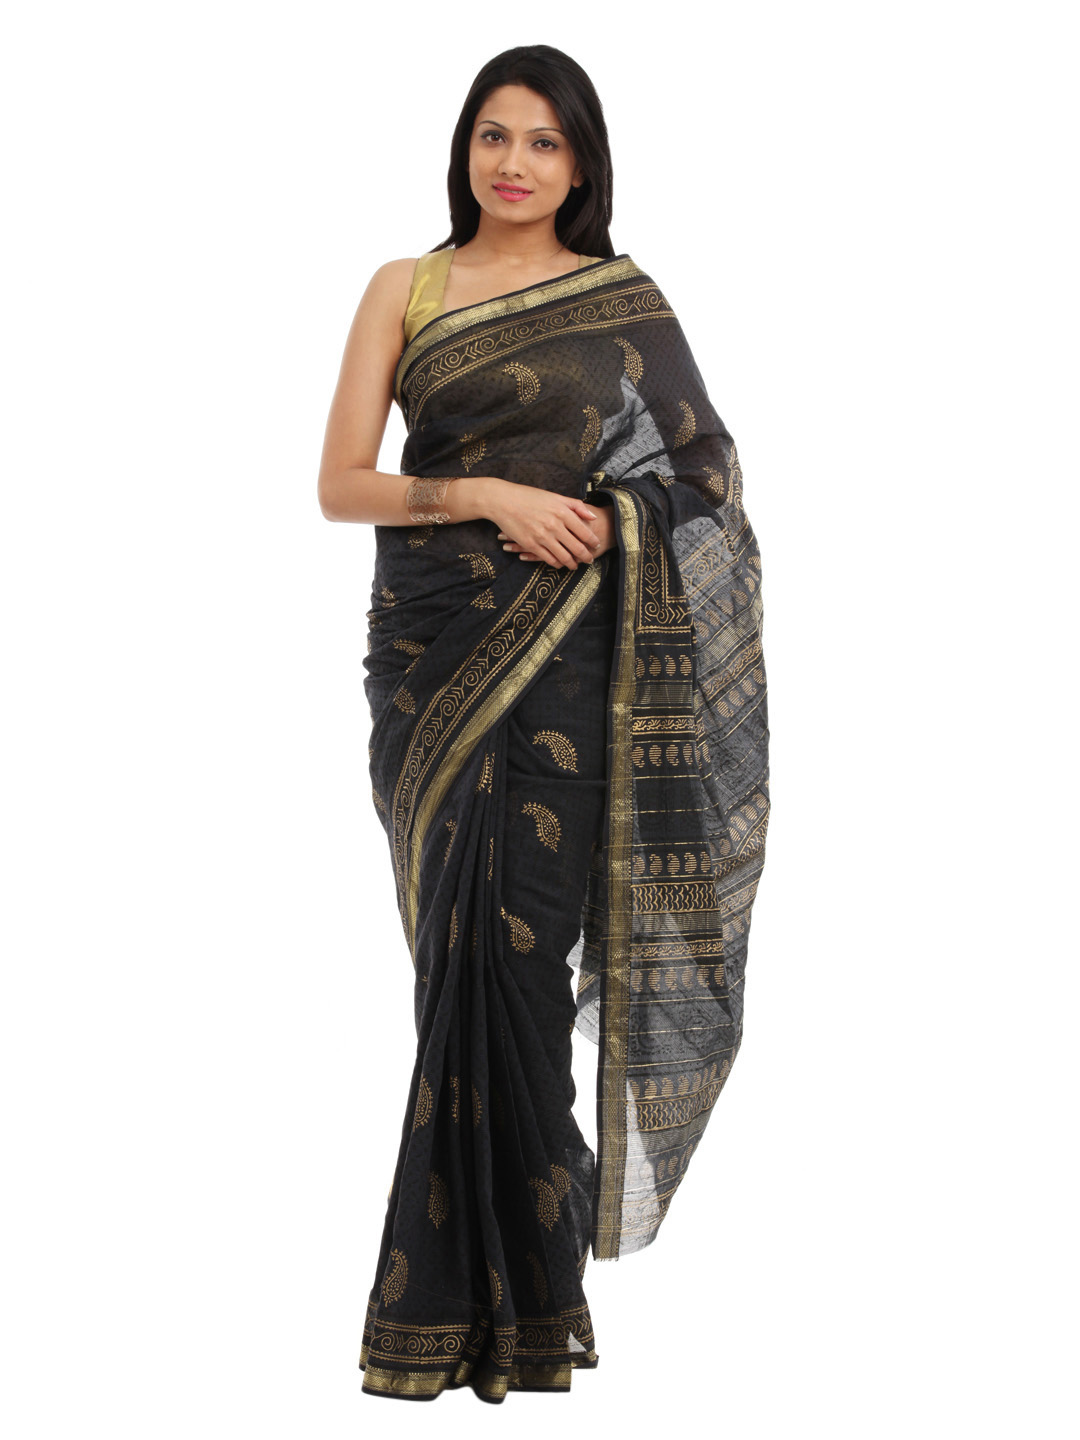

In [30]:
Image(filenames[indices[0][2]])

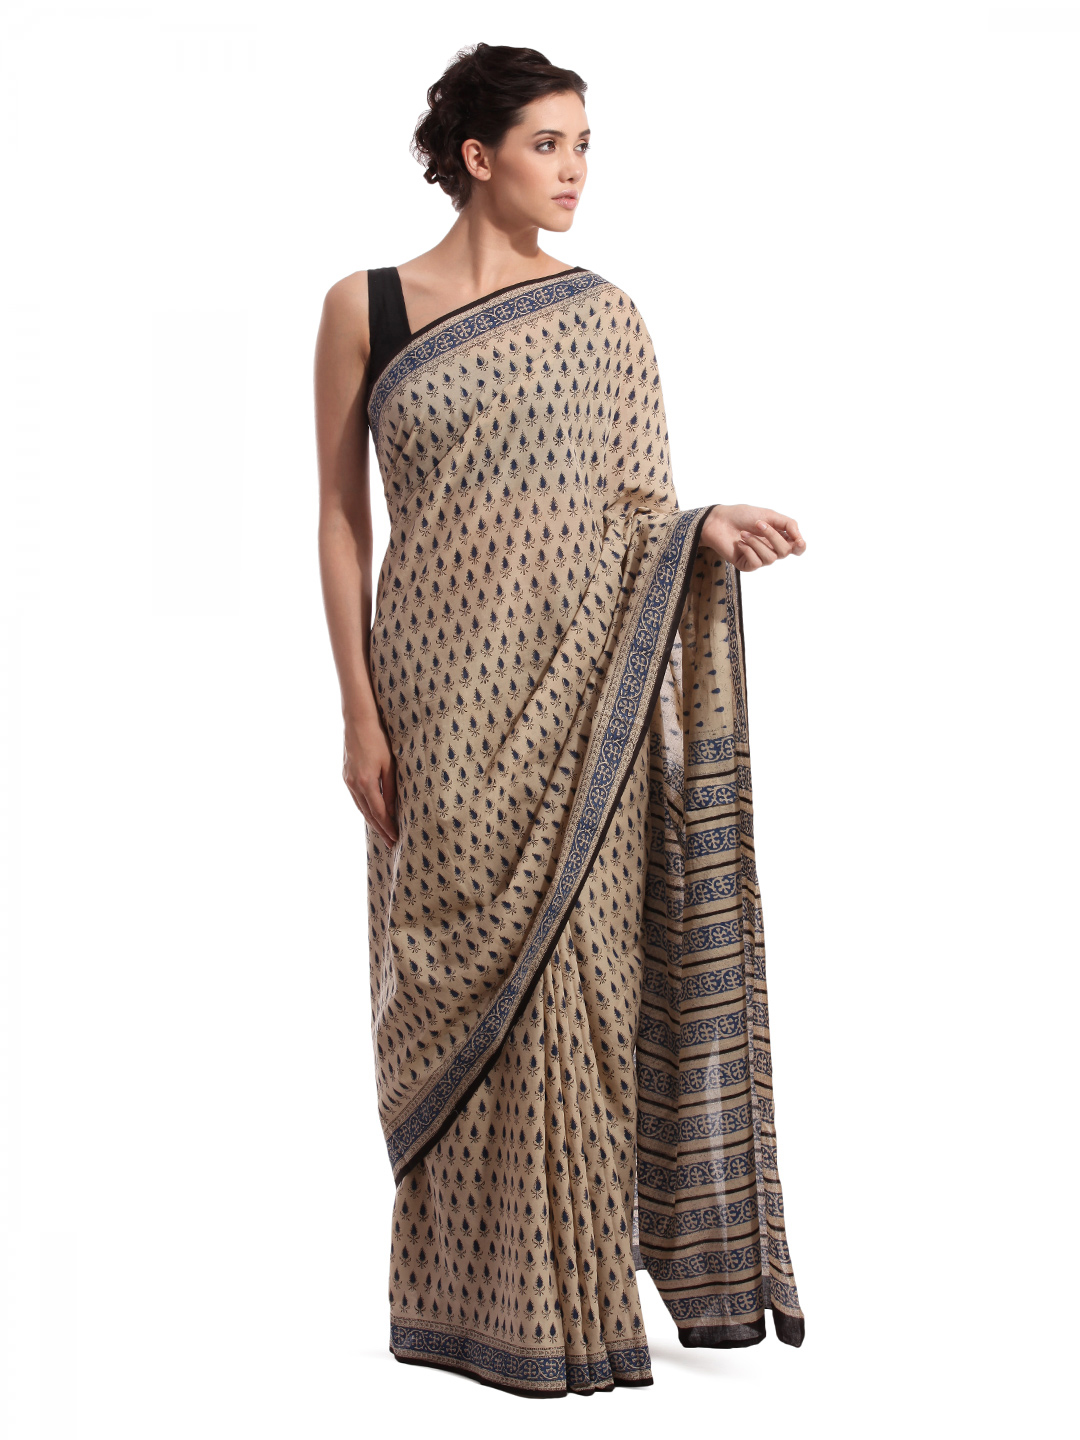

In [31]:
Image(filenames[indices[0][3]])

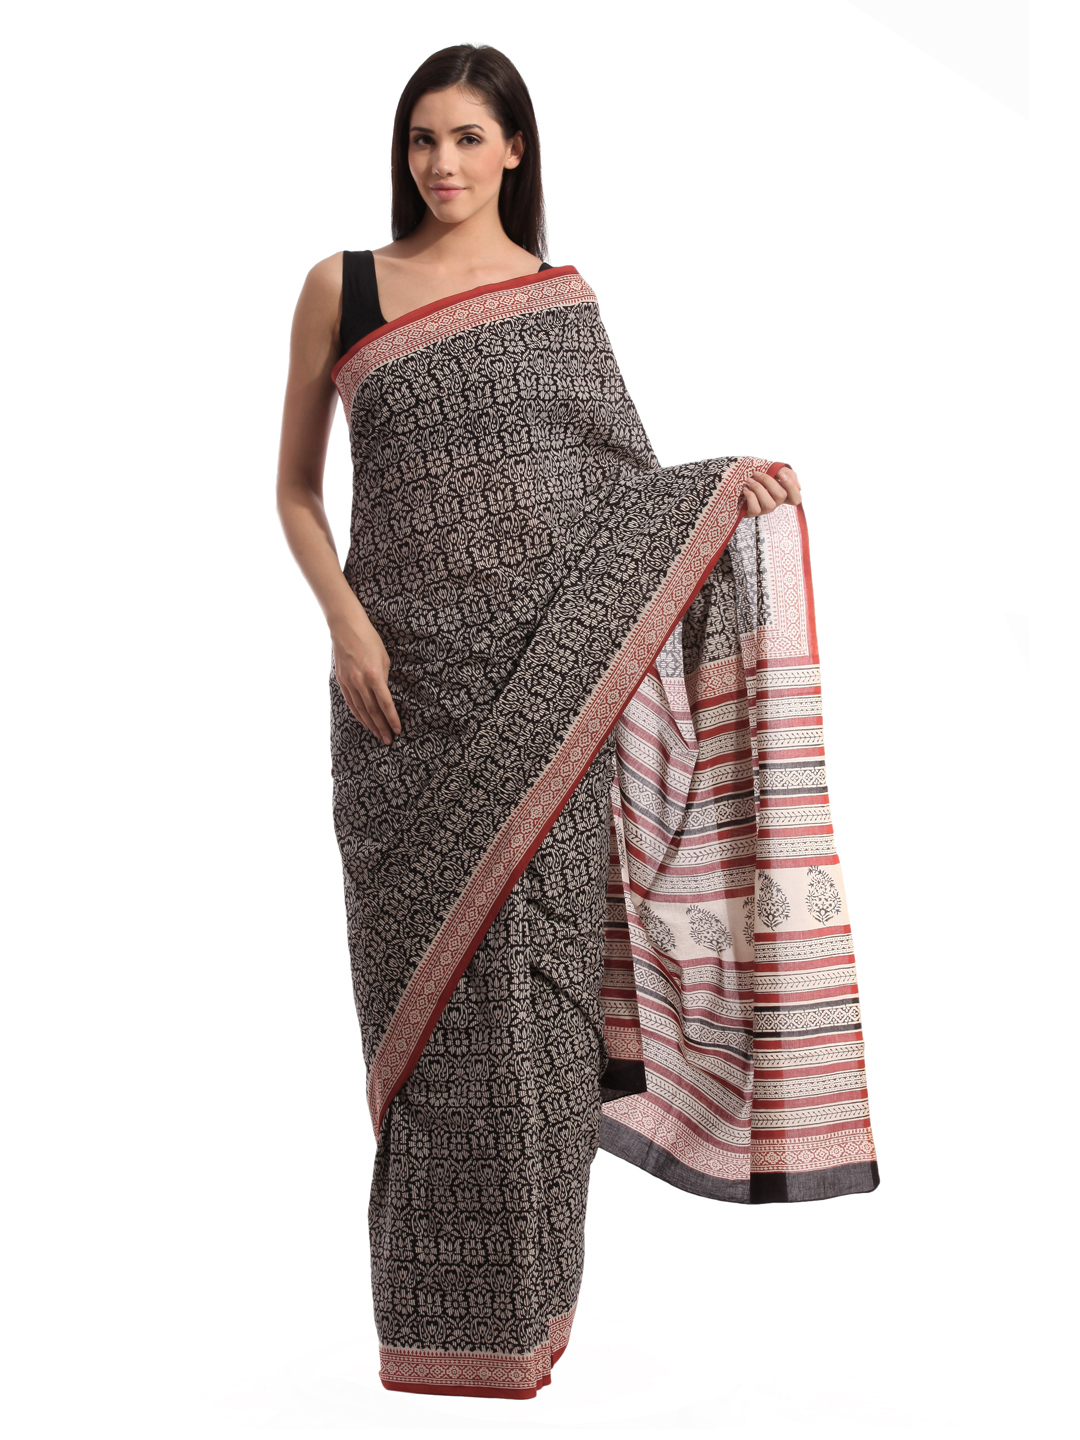

In [32]:
Image(filenames[indices[0][4]])